##Isolation Forests##

Used Isolation Forests algorithm to detect the anomalies.


*   The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions

*   Typical machine learning methods work better when the patterns are balanced (i.e. the same amount of good and bad behaviors are present in the dataset)

*   Isolation Forests algorithm isolates the observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature

*   Isolating anomaly observations is easier because only a few conditions are needed to separate those cases from the normal observations

*   The algorithm constructs the separation by first creating isolation trees, or random decision trees. Then, the score is calculated as the path length to isolate the observation.

*   The less the number of isolation trees or random decision trees, the less the path length and hence anomalies can be detected easily

*   Isolation Forest algorithm has a low linear time complexity and a small memory requirement ; builds a good performing model with a small number of trees using small sub-samples of fixed size, regardless of the size of a data set












##Local Outlier Factor (LOF) Algorithm##


*   LOF is an unsupervised outlier detection method which computes the local density deviation of a given data point with respect to its neighbors
*   it considers the outlier samples that have a substantially lower density than their neighbors


In [3]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42

In [4]:
LABELS = ['Normal','Fraud']

In [5]:
df = pd.read_csv('/content/creditcard.csv', sep = ',')

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

##Exploratory Data Analysis##

In [8]:
df.isnull().values.any()

False

Text(0, 0.5, 'Frequency')

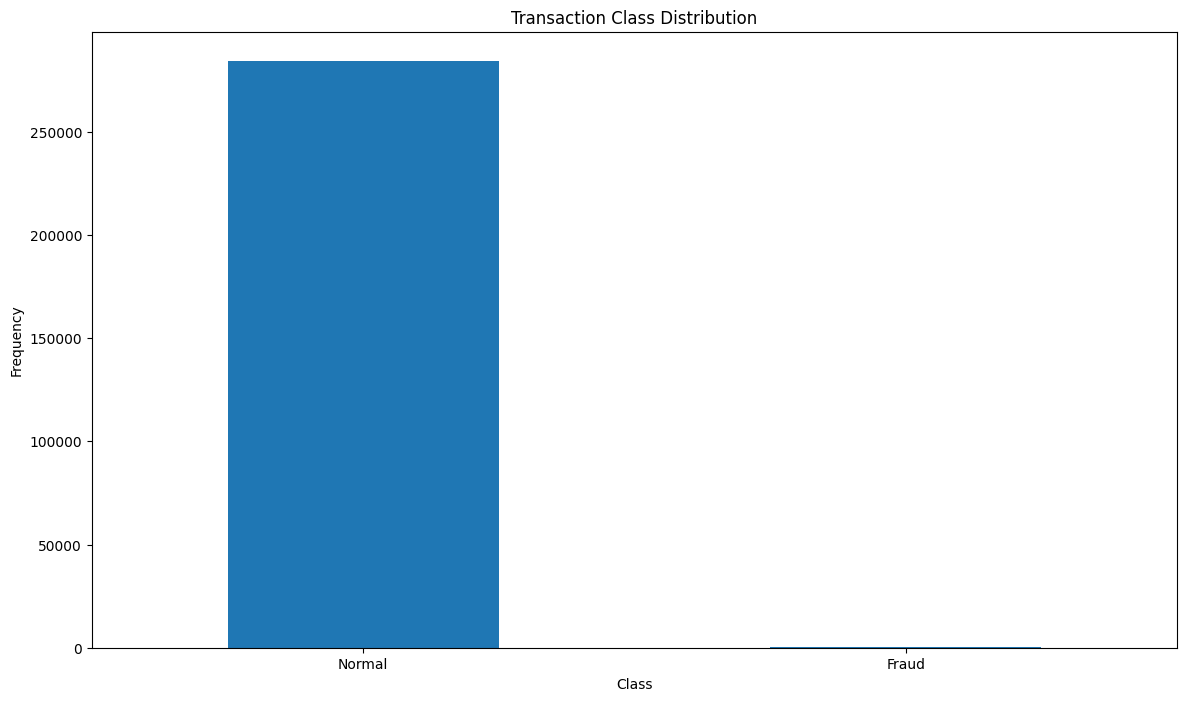

In [18]:
# To count the occurrences of each class in the 'Class' column of the dataset

count_classes = pd.value_counts(df['Class'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [19]:
# Collect the 'Fraud' and the 'Normal' dataset

fraud = df[df['Class']==1]  # 'Fraud' dataset

normal = df[df['Class']==0]  # 'Normal' dataset

In [20]:
fraud.shape

(492, 31)

In [13]:
normal.shape

(284315, 31)

In [14]:
fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [15]:
# To analyze a detailed information about the transaction data

fraud.Amount.describe()  # gives the statistical summary of the 'Amount' column for fraudulent transactions

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [16]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

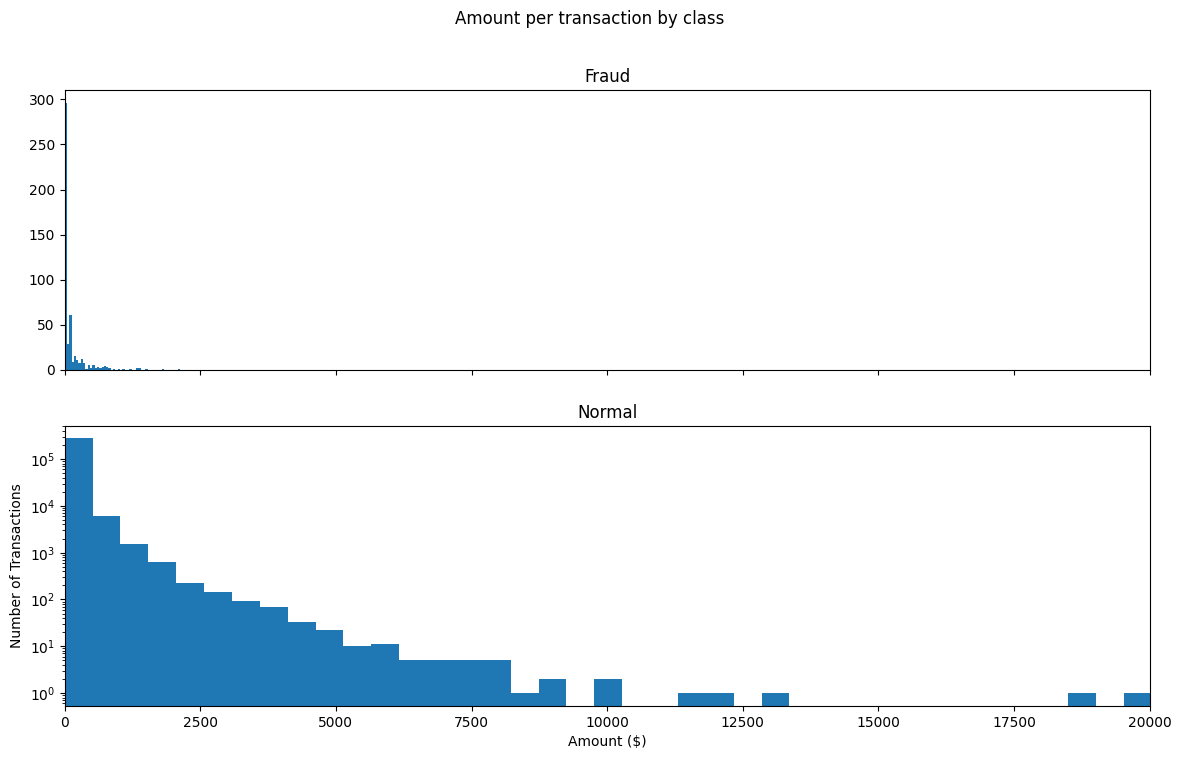

In [21]:
# To create a plot showing the distribution of Amount per transaction vs Number of transactions for each class

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

f.suptitle('Amount per transaction by class')

bins = 50

# for class Fraud
ax1.hist(fraud.Amount, bins=bins)
ax1.set_title('Fraud')

# for class Normal
ax2.hist(normal.Amount, bins=bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)') # Setting the label for the x-axis (shared by both subplots)

plt.ylabel('Number of Transactions')  # Setting the label for the y-axis (


plt.xlim((0, 20000))  # Setting the range for the x-axis from 0 to 20000


plt.yscale('log')  # Setting the scale of the y-axis to logarithmic for a better visualizion of the distribution of transaction amounts

plt.show()


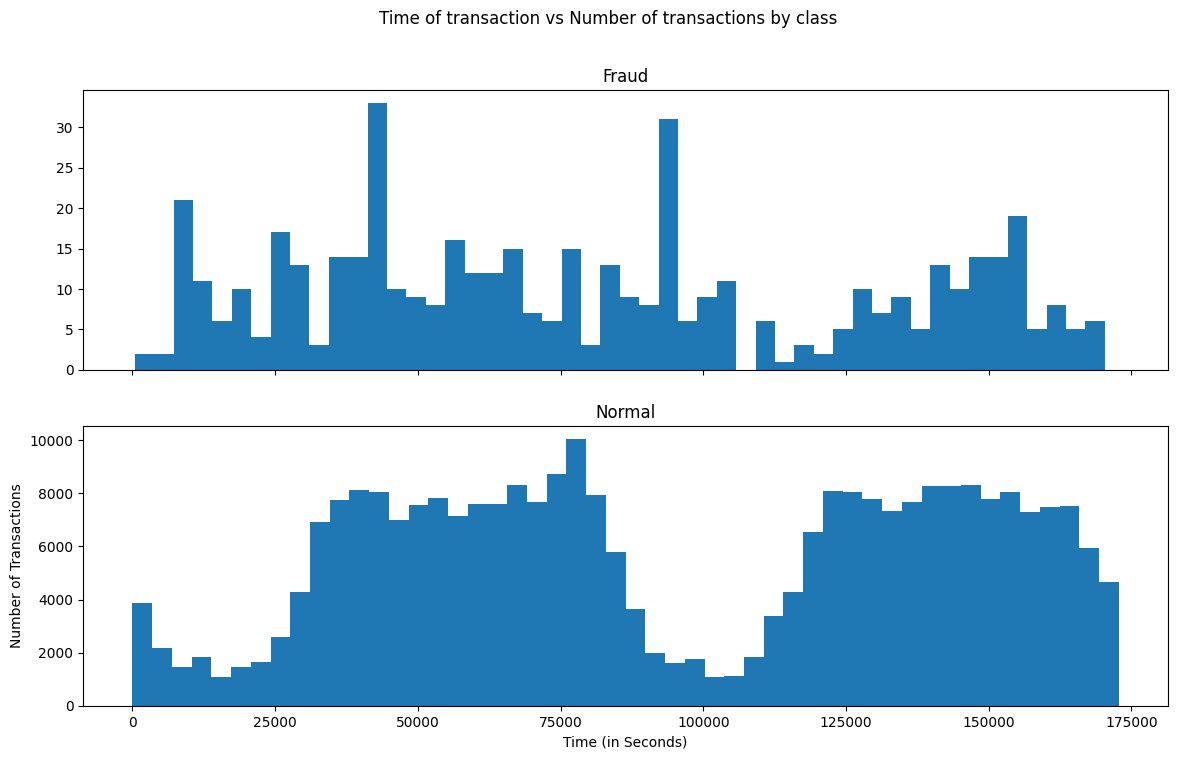

In [24]:
# To check if fraudulent transactions occur more often during certain time frames

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

f.suptitle('Time of transaction vs Number of transactions by class')

# for class Fraud
ax1.hist(fraud.Time, bins=50)
ax1.set_title('Fraud')

# for class Normal
ax2.hist(normal.Time, bins=50)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')

plt.ylabel('Number of Transactions')

plt.show()

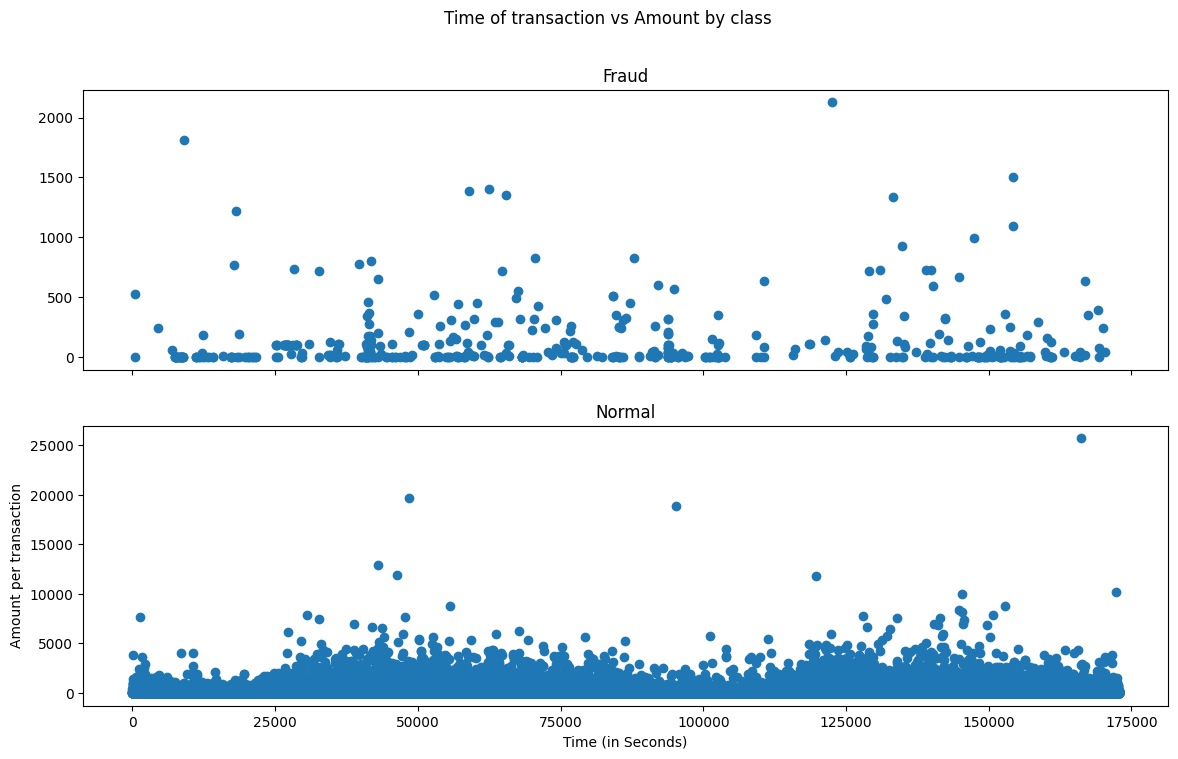

In [25]:
# To check if fraudulent transactions occur more often during certain time frames

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

f.suptitle('Time of transaction vs Amount by class')

# for class Fraud
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')

# for class Normal
ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount per transaction')
plt.show()

In [26]:
# Taking a random sample off from the data

df1 = df.sample(frac=0.1, random_state=1)  # randomly samples 10% of the rows from the original dataframe ; random_state = 1 sets a seed for the random number generator and ensures that every time the code is run with the same random_state, the same sample will be drawn

df1.shape


(28481, 31)

In [27]:
df.shape

(284807, 31)

In [30]:
# Determines the number of fraud and valid transactions in the sampled dataset

Fraud = df1[df1['Class'] == 1]

Valid = df1[df1['Class'] == 0]

outlier_fraction = len(Fraud)/(len(Valid))

In [31]:
print(outlier_fraction)

print("Fraud Cases : {}".format(len(Fraud)))

print("Valid Cases : {}".format(len(Valid)))

0.0017234102419808666
Fraud Cases : 49
Valid Cases : 28432


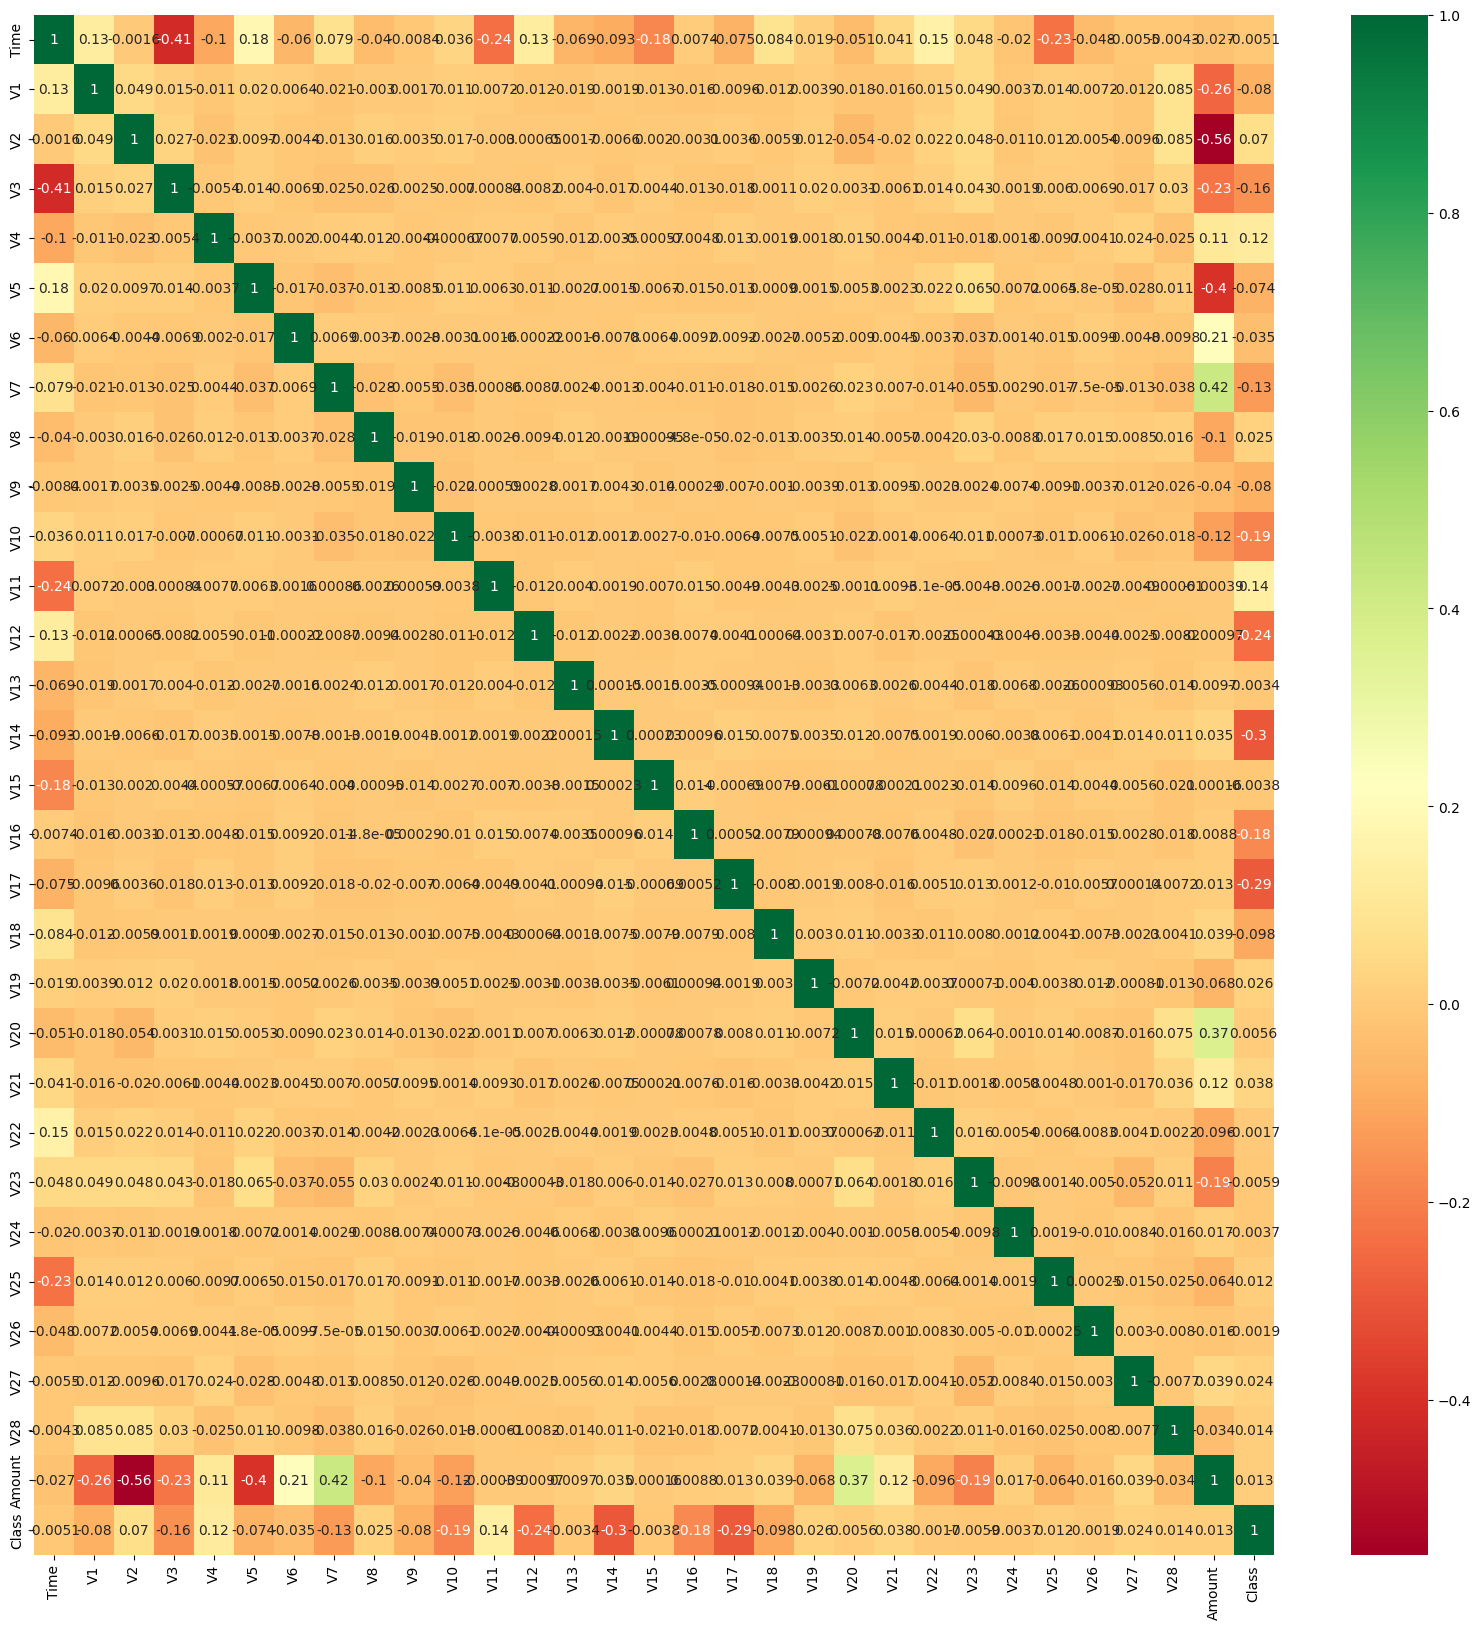

In [32]:
# Correlation Analysis

import seaborn as sns

corrmat = df1.corr() # gets the correlation matrix of all features (columns) in the dataset

top_corr_features = corrmat.index  # gets the names of the features (columns) in the order of their appearance in the correlation matrix

plt.figure(figsize=(20, 20))

# Plotting a heatmap to visualize the correlation matrix with the 'RdYlGn' colormap
g = sns.heatmap(df1[top_corr_features].corr(), annot=True, cmap="RdYlGn")  # Positive correlations are shown in green, negative correlations in red, and weak correlations in yellow


In [33]:
corrmat

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.126475,-0.001584,-0.413547,-0.104527,0.182205,-0.060483,0.078924,-0.040474,-0.008428,...,0.041323,0.150603,0.047941,-0.020018,-0.229491,-0.048131,-0.005541,-0.004339,-0.026969,-0.005087
V1,0.126475,1.000000,0.048796,0.015452,-0.010592,0.019888,0.006417,-0.020583,-0.003013,0.001658,...,-0.016415,0.014896,0.049447,-0.003709,0.014055,0.007203,-0.011545,0.085035,-0.262703,-0.079820
V2,-0.001584,0.048796,1.000000,0.027270,-0.022539,0.009666,-0.004411,-0.013456,0.015662,0.003456,...,-0.020127,0.021923,0.047591,-0.011386,0.011838,0.005366,-0.009611,0.084873,-0.556401,0.069598
V3,-0.413547,0.015452,0.027270,1.000000,-0.005423,0.013997,-0.006903,-0.024640,-0.025529,0.002525,...,-0.006083,0.014177,0.042603,-0.001883,0.005975,0.006869,-0.017094,0.029973,-0.225099,-0.160051
V4,-0.104527,-0.010592,-0.022539,-0.005423,1.000000,-0.003708,0.002029,0.004432,0.011659,-0.004395,...,-0.004423,-0.011251,-0.017682,0.001829,-0.009692,0.004087,0.024489,-0.024554,0.111692,0.122631
V5,0.182205,0.019888,0.009666,0.013997,-0.003708,1.000000,-0.016656,-0.037463,-0.013263,-0.008506,...,0.002288,0.022065,0.064703,-0.007184,0.006493,0.000048,-0.027934,0.010991,-0.397437,-0.073519
V6,-0.060483,0.006417,-0.004411,-0.006903,0.002029,-0.016656,1.000000,0.006923,0.003695,-0.002762,...,0.004490,-0.003705,-0.036726,0.001428,-0.015012,0.009938,-0.004811,-0.009772,0.213007,-0.035085
V7,0.078924,-0.020583,-0.013456,-0.024640,0.004432,-0.037463,0.006923,1.000000,-0.028291,-0.005510,...,0.007012,-0.013871,-0.055242,0.002899,-0.016941,-0.000075,-0.012973,-0.037593,0.417814,-0.134247
V8,-0.040474,-0.003013,0.015662,-0.025529,0.011659,-0.013263,0.003695,-0.028291,1.000000,-0.018645,...,-0.005651,-0.004195,0.030092,-0.008821,0.017298,0.015385,0.008495,0.015525,-0.102221,0.024896
V9,-0.008428,0.001658,0.003456,0.002525,-0.004395,-0.008506,-0.002762,-0.005510,-0.018645,1.000000,...,0.009462,-0.002297,0.002360,0.007441,-0.009149,-0.003652,-0.011701,-0.026290,-0.039773,-0.079962


In [34]:
top_corr_features

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [35]:
df1.columns.tolist()

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Class']

In [36]:
# To create independent and dependent features

columns = df1.columns.tolist()  # Creates a list of all the column names in the sampled dataset

# Filtering the columns to remove the 'Class' column, which is the target variable so that we can use the remaining columns as independent features
columns.remove('Class')

target = "Class"

state = np.random.RandomState(42)  # Ensures that any random operations produce the same results each time the code is run

X = df1[columns]  # Creates the DataFrame X containing the independent features

Y = df1[target]  # Creates the Series Y containing the dependent feature (target variable)

# To generate the synthetic outlier data for X using a uniform distribution between 0 and 1
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))

print(X.shape)
print(Y.shape)


(28481, 30)
(28481,)


In [37]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
169876,119907.0,-0.611712,-0.769705,-0.149759,-0.224877,2.028577,-2.019887,0.292491,-0.523020,0.358468,...,-0.196039,-0.075208,0.045536,0.380739,0.023440,-2.220686,-0.201146,0.066501,0.221180,1.79
127467,78340.0,-0.814682,1.319219,1.329415,0.027273,-0.284871,-0.653985,0.321552,0.435975,-0.704298,...,-0.009041,-0.128619,-0.368565,0.090660,0.401147,-0.261034,0.080621,0.162427,0.059456,1.98
137900,82382.0,-0.318193,1.118618,0.969864,-0.127052,0.569563,-0.532484,0.706252,-0.064966,-0.463271,...,0.206028,-0.305402,-0.774704,-0.123884,-0.495687,-0.018148,0.121679,0.249050,0.092516,0.89
21513,31717.0,-1.328271,1.018378,1.775426,-1.574193,-0.117696,-0.457733,0.681867,-0.031641,0.383872,...,0.315823,-0.220815,-0.419013,-0.239197,0.009967,0.232829,0.814177,0.098797,-0.004273,15.98
134700,80923.0,1.276712,0.617120,-0.578014,0.879173,0.061706,-1.472002,0.373692,-0.287204,-0.084482,...,-0.105286,-0.160161,-0.430404,-0.076738,0.258708,0.552170,0.370701,-0.034255,0.041709,0.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2032,1574.0,-0.615776,0.654356,2.618793,0.857434,-0.487340,0.593957,-0.095191,0.426786,0.011607,...,-0.008094,0.010440,0.113631,-0.313035,-0.015388,0.213878,-0.268579,0.117815,0.075734,9.99
240932,150813.0,-3.517229,3.326821,-3.590262,0.674769,-0.679266,-0.469516,-1.135362,2.778095,-2.404956,...,-0.570960,0.455767,0.388102,0.268986,0.382692,-0.653335,2.192962,-0.953907,-0.137082,0.76
3701,3169.0,-0.315540,1.054303,1.484711,1.138262,0.394713,-0.168883,0.737923,-0.061284,-0.952381,...,0.138818,0.005626,0.094740,0.024370,0.091800,-0.463470,-0.457328,0.194541,0.166039,19.60
153365,98752.0,-3.580417,4.100916,-2.577720,-1.476718,-0.006201,-2.008418,0.887262,0.304192,2.879710,...,1.312993,-0.194866,0.571678,-0.001519,0.009117,0.321669,0.034900,0.785417,0.353092,0.92


In [38]:
Y

169876    0
127467    0
137900    0
21513     0
134700    0
         ..
2032      0
240932    0
3701      0
153365    0
97365     0
Name: Class, Length: 28481, dtype: int64

# Model Prediction

### Local Outlier Factor(LOF) Algorithm

The number of neighbors considered, (parameter n_neighbors) is typically chosen

1.   greater than the minimum number of objects a cluster has to contain, so that other objects can be local outliers relative to this cluster
2.   smaller than the maximum number of close by objects that can potentially be local outliers

In practice, such informations are generally not available, and taking n_neighbors=20 appears to work well in general

In [41]:
# Defining the outlier detection methods

classifiers = {
    # Isolation Forest classifier
    "Isolation Forest": IsolationForest(
        n_estimators=100,              # Number of base estimators in the ensemble
        max_samples=len(X),            # Number of samples to draw from X to train each base estimator
        contamination=outlier_fraction,# Proportion of outliers in the data set
        random_state=42,               # Seed for random number generator
        verbose=0
    ),

    # Local Outlier Factor classifier
    "Local Outlier Factor": LocalOutlierFactor(
        n_neighbors=20,                # Number of neighbors to use for k-neighbors queries
        algorithm='auto',              # Algorithm to use for nearest neighbors computation
        leaf_size=30,                  # Leaf size passed to BallTree or KDTree
        metric='minkowski',            # Distance metric to use for tree
        p=2,                           # Parameter for the Minkowski metric
        metric_params=None,            # Additional keyword arguments for the metric function
        contamination=outlier_fraction # Proportion of outliers in the data set
    ),

    # Support Vector Machine classifier
    "Support Vector Machine": OneClassSVM(
        kernel='rbf',                  # Specifies the kernel type to be used in the algorithm
        degree=3,                      # Degree of the polynomial kernel function (ignored by 'rbf')
        gamma=0.1,                     # Kernel coefficient
        nu=0.05,                       # An upper bound on the fraction of margin errors
        max_iter=-1,                   # Hard limit on iterations within solver, or -1 for no limit
    )
}

In [42]:
type(classifiers)

dict

In [44]:
n_outliers = len(Fraud)  # number of outliers in the Fraud class

for i, (clf_name, clf) in enumerate(classifiers.items()):

    if clf_name == "Local Outlier Factor":  # fits the Local Outlier Factor model and predict the outliers
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_  # gets the negative outlier factor scores

    elif clf_name == "Support Vector Machine":
        clf.fit(X)  # Fit the model before predicting
        y_pred = clf.predict(X)

    else:
        # For Isolation Forest
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)

    # Reshapes the prediction values: 0 for valid transactions, 1 for fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1

    n_errors = (y_pred != Y).sum()  # calculatse the number of errors (mismatches between predicted and actual values)

    print("{}: {}".format(clf_name, n_errors))  # prints the number of errors for the classifier

    print("Accuracy Score:")
    print(accuracy_score(Y, y_pred))

    print("Classification Report:")
    print(classification_report(Y, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Isolation Forest: 73
Accuracy Score:
0.9974368877497279
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.26      0.27      0.26        49

    accuracy                           1.00     28481
   macro avg       0.63      0.63      0.63     28481
weighted avg       1.00      1.00      1.00     28481

Local Outlier Factor: 97
Accuracy Score:
0.9965942207085425
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.02      0.02      0.02        49

    accuracy                           1.00     28481
   macro avg       0.51      0.51      0.51     28481
weighted avg       1.00      1.00      1.00     28481

Support Vector Machine: 8516
Accuracy Score:
0.7009936448860644
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.70      0.8

# Observations and Conclusion

### Fraud Detection Model Performance Comparison

Three different models for fraud detection: Isolation Forest, Local Outlier Factor (LOF), and Support Vector Machine (SVM). Here are the

1. **Error Detection**:
   - **Isolation Forest**: Detected 73 errors.
   - **Local Outlier Factor**: Detected 97 errors.
   - **Support Vector Machine**: Detected 8516 errors.

2. **Accuracy**:
   - **Isolation Forest**: 99.74%
   - **Local Outlier Factor**: 99.65%
   - **Support Vector Machine**: 70.09%

3. **Precision and Recall for Fraud Detection**:
   - **Isolation Forest**: Exhibited a fraud detection rate of approximately 27%.
   - **Local Outlier Factor**: Exhibited a fraud detection rate of just 2%.
   - **Support Vector Machine**: Exhibited a fraud detection rate of 0%.

4. **Overall Performance**:
   - The **Isolation Forest** method performed significantly better in determining fraud cases, with an overall detection rate of around 30%.

### Conclusion

- **Isolation Forest** was the most effective model in this evaluation, outperforming both LOF and SVM in detecting fraudulent transactions.
- The model's high accuracy and precision make it a suitable choice for fraud detection in this dataset.

### Future Work

- **Increasing Sample Size**: Enhancing the model's accuracy can be achieved by increasing the sample size, providing more data for training.
- **Deep Learning Algorithms**: Implementing deep learning algorithms could improve accuracy further, albeit with higher computational costs.
- **Complex Anomaly Detection Models**: Exploring more sophisticated anomaly detection models could yield better accuracy in identifying fraudulent cases.
